# This notebook compares results from a spreadsheet from Zajacz to PySulfSat

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
pd.options.display.max_columns = None

In [3]:
df=pd.read_excel('Excel_Zajacz_calculator.xlsx', 
                sheet_name='PySulfSat_Structure')

In [4]:
Z_calc=ss.calculate_ZT2022_SCAS(df=df, T_K=df['T (oC)']+273.15)
Z_calc.head()

,Calc SCAS (ppm),P (bar),T (oC),SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,H2O_Liq,Unnamed: 11,SCAS (ppm),SiO2,TiO2,Al2O3,FeOt,MgO,CaO,Na2O,K2O,H2O,Total,Unnamed: 23,SiO2.1,TiO2.1,Al2O3.1,FeOt.1,MgO.1,CaO.1,Na2O.1,K2O.1,H2O.1,Total.1,Unnamed: 34,NBO/T,P_Rhyo,P_c,P_T,P_H2O,Unnamed: 40,KSp(Anh),XS(melt),S melt (ppm),MnO_Liq
0,853.753727,2000,1000,65.800,0.47,18.940,1.630000,0.250,1.700,5.02,6.060,7.320,NaN,853.115226,1.095024,0.005885,0.185759,0.022686,0.006202,0.030314,0.080994,0.064331,0.406215,1.897411,NaN,0.577115,0.003102,0.097901,0.011956,0.003269,0.015976,0.042687,0.033905,0.214089,1.0,NaN,0.025595,0.008214,0.109353,0.002035,0.679155,NaN,0.000022,0.001402,853.115226,0
1,580.647523,1500,1000,64.710,0.67,19.510,1.640000,0.480,2.280,4.81,5.760,3.000,NaN,580.324978,1.076885,0.008390,0.191350,0.022825,0.011908,0.040656,0.077606,0.061146,0.166482,1.657247,NaN,0.649803,0.005062,0.115462,0.013773,0.007185,0.024532,0.046828,0.036896,0.100457,1.0,NaN,0.031231,0.011096,0.191866,0.002035,0.447895,NaN,0.000027,0.001092,580.324978,0
2,5597.501501,1000,1200,56.118,1.08,15.665,7.349000,4.372,6.940,3.44,1.061,3.197,NaN,5594.990243,0.933899,0.013524,0.153639,0.102283,0.108459,0.123752,0.055502,0.011263,0.177414,1.679734,NaN,0.555980,0.008051,0.091466,0.060892,0.064569,0.073673,0.033042,0.006705,0.105620,1.0,NaN,0.399009,0.068279,1.039550,0.004720,0.548793,NaN,0.000765,0.010386,5594.990243,0
3,5300.652834,1000,1050,56.250,1.08,15.700,17.144494,4.380,6.950,3.44,1.060,2.980,NaN,5298.985165,0.936096,0.013524,0.153982,0.000000,0.108658,0.123930,0.055502,0.011253,0.165372,1.568316,NaN,0.596880,0.008623,0.098183,0.000000,0.069283,0.079021,0.035389,0.007175,0.105445,1.0,NaN,0.233687,0.072782,1.137069,0.002572,0.507872,NaN,0.000369,0.004669,2348.308383,0
4,2896.490670,2000,1100,59.440,0.70,16.140,5.237000,2.930,5.218,3.77,2.340,3.990,NaN,2894.795631,0.989183,0.008765,0.158297,0.072888,0.072687,0.093046,0.060826,0.024841,0.221421,1.701953,NaN,0.581204,0.005150,0.093009,0.042826,0.042708,0.054670,0.035739,0.014595,0.130098,1.0,NaN,0.254239,0.037305,0.689114,0.003196,0.554110,NaN,0.000290,0.005304,2894.795631,0


### Comparing SCAS from spreadsheet and python

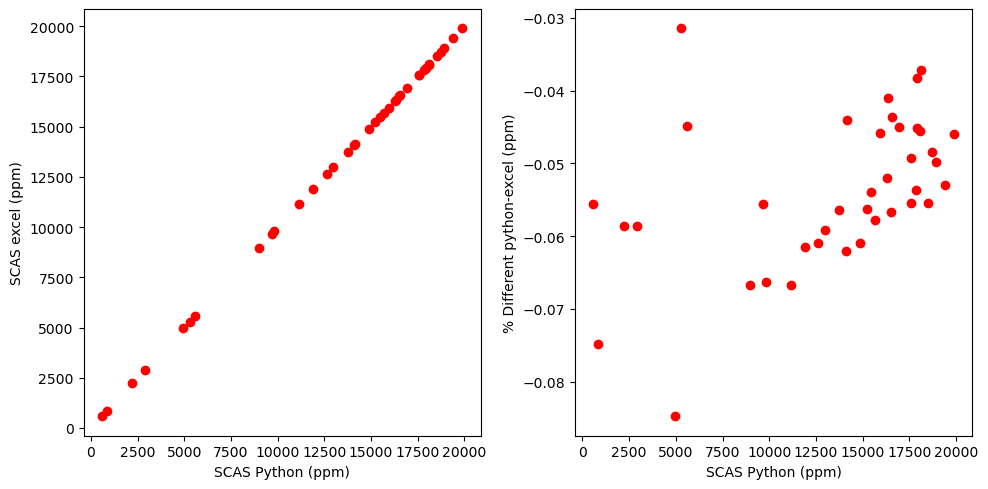

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Z_calc['Calc SCAS (ppm)'], df['SCAS (ppm)'], 'or')
ax1.set_xlabel('SCAS Python (ppm)')
ax1.set_ylabel('SCAS excel (ppm)')

ax2.plot(Z_calc['Calc SCAS (ppm)'], 100-100*Z_calc['Calc SCAS (ppm)']/df['SCAS (ppm)'], 'or')
ax2.ticklabel_format(useOffset=False)
ax2.set_ylabel('% Different python-excel (ppm)')
ax2.set_xlabel('SCAS Python (ppm)')
fig.tight_layout()